## Classification

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Load Data from the CSV File

In [24]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [17]:
df.shape

(346, 10)

### Convert all the Dates Columns into DateTime Objects

In [55]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Data Visualization and Pre-Processing

#### Here we are checking How many have repaid the  Loan and how many are yet to pay

In [56]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### We are using Seaborn as the Visualization Tool and drawing various HeatMaps

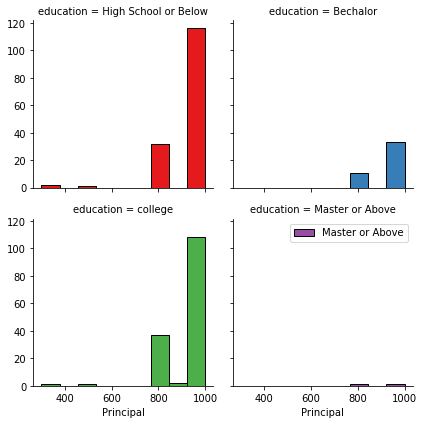

In [57]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="education", hue="education", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### ***We are visualizing the Loan Status of Both Genders with respect to Age*** 

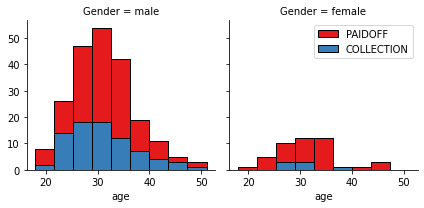

In [58]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-Processing: Feature Selection/ Extraction

#### This graph tells us the day people got their Loans 

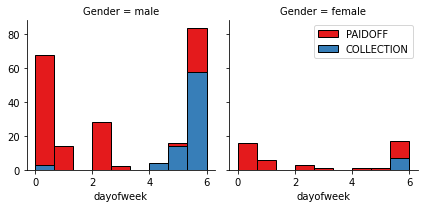

In [59]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We are seeing that the people who are getting loans on weekends are ussually not repaying, so **using Feature Binarization a threshold is set to values less than day 4**

In [60]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical Features to Numerical Values

**If we look at Gender**

In [62]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% of Females pay their loan whereas only 73% of males pay their loans

Let's convert Male to 0 and Female to 1

In [170]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### One hot Encoding

**Education**

In [171]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

**Feature before one hot Encoding**

In [158]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


**Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame**

In [159]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature Selection

**Lets defind feature sets, X:**

In [160]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


***What are our Labes...?***

In [164]:
y = df['loan_status'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
import warnings
warnings.filterwarnings('ignore')

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [172]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

***

# Classification

In [74]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


***

## K Nearest Neighbors (KNN)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

In [113]:
yhat = kNN_model.predict(X_test)
yhat[0:10]

for k in range(len(yhat)):
    print(k+1, ")", yhat[k])

1 ) PAIDOFF
2 ) PAIDOFF
3 ) PAIDOFF
4 ) PAIDOFF
5 ) PAIDOFF
6 ) PAIDOFF
7 ) COLLECTION
8 ) COLLECTION
9 ) PAIDOFF
10 ) PAIDOFF
11 ) PAIDOFF
12 ) COLLECTION
13 ) PAIDOFF
14 ) PAIDOFF
15 ) PAIDOFF
16 ) PAIDOFF
17 ) COLLECTION
18 ) PAIDOFF
19 ) COLLECTION
20 ) PAIDOFF
21 ) PAIDOFF
22 ) COLLECTION
23 ) COLLECTION
24 ) PAIDOFF
25 ) PAIDOFF
26 ) COLLECTION
27 ) COLLECTION
28 ) PAIDOFF
29 ) COLLECTION
30 ) PAIDOFF
31 ) PAIDOFF
32 ) PAIDOFF
33 ) PAIDOFF
34 ) PAIDOFF
35 ) PAIDOFF
36 ) PAIDOFF
37 ) COLLECTION
38 ) PAIDOFF
39 ) PAIDOFF
40 ) PAIDOFF
41 ) COLLECTION
42 ) PAIDOFF
43 ) PAIDOFF
44 ) COLLECTION
45 ) PAIDOFF
46 ) PAIDOFF
47 ) PAIDOFF
48 ) COLLECTION
49 ) PAIDOFF
50 ) PAIDOFF
51 ) PAIDOFF
52 ) PAIDOFF
53 ) PAIDOFF
54 ) PAIDOFF
55 ) PAIDOFF
56 ) PAIDOFF
57 ) PAIDOFF
58 ) PAIDOFF
59 ) PAIDOFF
60 ) PAIDOFF
61 ) PAIDOFF
62 ) PAIDOFF
63 ) PAIDOFF
64 ) COLLECTION
65 ) PAIDOFF
66 ) COLLECTION
67 ) PAIDOFF
68 ) PAIDOFF
69 ) PAIDOFF
70 ) PAIDOFF


In [103]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
for i in range(len(mean_acc)):
    print(i+1, ")", mean_acc[i])

1 ) 0.6714285714285714
2 ) 0.6571428571428571
3 ) 0.7142857142857143
4 ) 0.6857142857142857
5 ) 0.7571428571428571
6 ) 0.7142857142857143
7 ) 0.7857142857142857
8 ) 0.7571428571428571
9 ) 0.7571428571428571
10 ) 0.6714285714285714
11 ) 0.7
12 ) 0.7285714285714285
13 ) 0.7
14 ) 0.7


***

## Decesion Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [102]:
yhat = DT_model.predict(X_test)
yhat

for j in range(len(yhat)):
    print(j+1,")", yhat[j])

1 ) COLLECTION
2 ) COLLECTION
3 ) PAIDOFF
4 ) PAIDOFF
5 ) PAIDOFF
6 ) PAIDOFF
7 ) PAIDOFF
8 ) PAIDOFF
9 ) PAIDOFF
10 ) COLLECTION
11 ) PAIDOFF
12 ) COLLECTION
13 ) PAIDOFF
14 ) PAIDOFF
15 ) PAIDOFF
16 ) PAIDOFF
17 ) COLLECTION
18 ) PAIDOFF
19 ) COLLECTION
20 ) PAIDOFF
21 ) PAIDOFF
22 ) COLLECTION
23 ) COLLECTION
24 ) COLLECTION
25 ) PAIDOFF
26 ) COLLECTION
27 ) COLLECTION
28 ) PAIDOFF
29 ) COLLECTION
30 ) PAIDOFF
31 ) COLLECTION
32 ) COLLECTION
33 ) COLLECTION
34 ) PAIDOFF
35 ) PAIDOFF
36 ) PAIDOFF
37 ) COLLECTION
38 ) PAIDOFF
39 ) COLLECTION
40 ) PAIDOFF
41 ) COLLECTION
42 ) PAIDOFF
43 ) PAIDOFF
44 ) COLLECTION
45 ) PAIDOFF
46 ) COLLECTION
47 ) COLLECTION
48 ) COLLECTION
49 ) PAIDOFF
50 ) PAIDOFF
51 ) PAIDOFF
52 ) PAIDOFF
53 ) PAIDOFF
54 ) PAIDOFF
55 ) PAIDOFF
56 ) PAIDOFF
57 ) PAIDOFF
58 ) PAIDOFF
59 ) COLLECTION
60 ) PAIDOFF
61 ) PAIDOFF
62 ) PAIDOFF
63 ) PAIDOFF
64 ) COLLECTION
65 ) PAIDOFF
66 ) COLLECTION
67 ) PAIDOFF
68 ) COLLECTION
69 ) PAIDOFF
70 ) PAIDOFF


***

## Support Vector Machine (SVM)

In [107]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [109]:
yhat = SVM_model.predict(X_test)
yhat

for l in range(len(yhat)):
    print(l+1, ")", yhat[l])

1 ) COLLECTION
2 ) PAIDOFF
3 ) PAIDOFF
4 ) PAIDOFF
5 ) PAIDOFF
6 ) PAIDOFF
7 ) COLLECTION
8 ) COLLECTION
9 ) PAIDOFF
10 ) PAIDOFF
11 ) PAIDOFF
12 ) PAIDOFF
13 ) PAIDOFF
14 ) PAIDOFF
15 ) PAIDOFF
16 ) PAIDOFF
17 ) COLLECTION
18 ) PAIDOFF
19 ) PAIDOFF
20 ) PAIDOFF
21 ) PAIDOFF
22 ) PAIDOFF
23 ) COLLECTION
24 ) COLLECTION
25 ) PAIDOFF
26 ) COLLECTION
27 ) COLLECTION
28 ) PAIDOFF
29 ) PAIDOFF
30 ) PAIDOFF
31 ) PAIDOFF
32 ) PAIDOFF
33 ) PAIDOFF
34 ) PAIDOFF
35 ) PAIDOFF
36 ) PAIDOFF
37 ) PAIDOFF
38 ) PAIDOFF
39 ) COLLECTION
40 ) PAIDOFF
41 ) PAIDOFF
42 ) PAIDOFF
43 ) PAIDOFF
44 ) COLLECTION
45 ) PAIDOFF
46 ) PAIDOFF
47 ) PAIDOFF
48 ) PAIDOFF
49 ) PAIDOFF
50 ) PAIDOFF
51 ) PAIDOFF
52 ) PAIDOFF
53 ) PAIDOFF
54 ) PAIDOFF
55 ) PAIDOFF
56 ) PAIDOFF
57 ) PAIDOFF
58 ) PAIDOFF
59 ) PAIDOFF
60 ) PAIDOFF
61 ) PAIDOFF
62 ) PAIDOFF
63 ) PAIDOFF
64 ) COLLECTION
65 ) PAIDOFF
66 ) PAIDOFF
67 ) PAIDOFF
68 ) PAIDOFF
69 ) PAIDOFF
70 ) PAIDOFF


***

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [111]:
yhat = LR_model.predict(X_test)
yhat

for n in range(len(yhat)):
    print(n+1, ")", yhat[n])

1 ) PAIDOFF
2 ) PAIDOFF
3 ) PAIDOFF
4 ) PAIDOFF
5 ) PAIDOFF
6 ) PAIDOFF
7 ) PAIDOFF
8 ) PAIDOFF
9 ) PAIDOFF
10 ) PAIDOFF
11 ) PAIDOFF
12 ) PAIDOFF
13 ) PAIDOFF
14 ) PAIDOFF
15 ) PAIDOFF
16 ) PAIDOFF
17 ) PAIDOFF
18 ) PAIDOFF
19 ) PAIDOFF
20 ) PAIDOFF
21 ) PAIDOFF
22 ) PAIDOFF
23 ) PAIDOFF
24 ) PAIDOFF
25 ) PAIDOFF
26 ) PAIDOFF
27 ) PAIDOFF
28 ) PAIDOFF
29 ) PAIDOFF
30 ) PAIDOFF
31 ) PAIDOFF
32 ) PAIDOFF
33 ) PAIDOFF
34 ) PAIDOFF
35 ) PAIDOFF
36 ) PAIDOFF
37 ) PAIDOFF
38 ) PAIDOFF
39 ) PAIDOFF
40 ) PAIDOFF
41 ) PAIDOFF
42 ) PAIDOFF
43 ) PAIDOFF
44 ) PAIDOFF
45 ) PAIDOFF
46 ) PAIDOFF
47 ) PAIDOFF
48 ) PAIDOFF
49 ) PAIDOFF
50 ) PAIDOFF
51 ) PAIDOFF
52 ) PAIDOFF
53 ) PAIDOFF
54 ) PAIDOFF
55 ) PAIDOFF
56 ) PAIDOFF
57 ) PAIDOFF
58 ) PAIDOFF
59 ) PAIDOFF
60 ) PAIDOFF
61 ) PAIDOFF
62 ) PAIDOFF
63 ) PAIDOFF
64 ) PAIDOFF
65 ) PAIDOFF
66 ) PAIDOFF
67 ) PAIDOFF
68 ) PAIDOFF
69 ) PAIDOFF
70 ) PAIDOFF


***

In [116]:
!pip3 install metrics

  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=8cbbb904a7913d91ded7d333bf6d7c813d0327424dd4232bbc4e295495e2b2a0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4f\55\f5\ca7e08a3ac083b918070e9d148ecafba8172b24611712ad678
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24227 sha256=109fb87bbc922d6cc617a30d065f1b491e4dc6ea8d80a9f9b66eac3e34fbf9b2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7c\bb\0d\525cedbe683d79ee6c9185fb7e3c27d30a43141ecf89ccb46b
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 6.1.0 requires pygments>=2.4.1, but you have pygments 2.2.0 which is incompatible.
jupyterlab-pygments 0.1.2 requires pygments<3,>=2.4.1, but you have pygments 2.2.0 which is incompatible.
You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Model Evaluation using Test Set

In [141]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Load Test Set for Evaluation

In [120]:
test_df = pd.read_csv('loan_test.csv')
test_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [153]:
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1
5,37,37,1,700,15,2016-09-11,2016-09-25,33,High School or Below,0,6,1
6,38,38,1,1000,15,2016-09-11,2016-09-25,24,college,0,6,1
7,48,48,1,1000,30,2016-09-11,2016-10-10,32,Bechalor,0,6,1
8,50,50,1,800,15,2016-09-11,2016-09-25,27,college,1,6,1
9,61,61,1,1000,15,2016-09-11,2016-09-25,37,college,0,6,1


### Preprocessing

In [154]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]

#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)          

test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

#fit - Compute the mean and std to be used for later scaling.
#transform - Perform standardization by centering and scaling.
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
#test_X[0:5]


for g in range(5):
    print(g+1, "] -----------------------------",)
    for h in range(8):
        print("   ",h+1, ")", test_X[g, h])

1 ] -----------------------------
    1 ) 0.49362588376987604
    2 ) 0.92844965623021
    3 ) 3.059818646541686
    4 ) 1.9771421064483226
    5 ) -1.30384048104053
    6 ) 2.3979157616563596
    7 ) -0.7977240352174656
    8 ) -0.861356769214109
2 ] -----------------------------
    1 ) -3.5626911611217125
    2 ) -1.7042774511623036
    3 ) 0.5333628833421289
    4 ) -0.5057805388588732
    5 ) 0.7669649888473705
    6 ) -0.41702882811414943
    7 ) -0.7977240352174656
    8 ) -0.861356769214109
3 ] -----------------------------
    1 ) 0.49362588376987604
    2 ) 0.92844965623021
    3 ) 1.8808059570485594
    4 ) 1.9771421064483226
    5 ) 0.7669649888473705
    6 ) -0.41702882811414943
    7 ) 1.2535663410560174
    8 ) -0.861356769214109
4 ] -----------------------------
    1 ) 0.49362588376987604
    2 ) 0.92844965623021
    3 ) -0.9825105745776053
    4 ) -0.5057805388588732
    5 ) 0.7669649888473705
    6 ) -0.41702882811414943
    7 ) -0.7977240352174656
    8 ) 1.16095912

In [155]:
test_y = test_df['loan_status'].values
#test_y[0:5]
# 1 = PAIDOFF
# 0 = COLLECTION


for y in range(len(test_y)):
    print(y+1, ")", test_y[y])

1 ) 1
2 ) 1
3 ) 1
4 ) 1
5 ) 1
6 ) 1
7 ) 1
8 ) 1
9 ) 1
10 ) 1
11 ) 1
12 ) 1
13 ) 1
14 ) 1
15 ) 1
16 ) 1
17 ) 1
18 ) 1
19 ) 1
20 ) 1
21 ) 1
22 ) 1
23 ) 1
24 ) 1
25 ) 1
26 ) 1
27 ) 1
28 ) 1
29 ) 1
30 ) 1
31 ) 1
32 ) 1
33 ) 1
34 ) 1
35 ) 1
36 ) 1
37 ) 1
38 ) 1
39 ) 1
40 ) 1
41 ) 0
42 ) 0
43 ) 0
44 ) 0
45 ) 0
46 ) 0
47 ) 0
48 ) 0
49 ) 0
50 ) 0
51 ) 0
52 ) 0
53 ) 0
54 ) 0


In [142]:
knn_yhat = kNN_model.predict(test_X)
#print("KNN Jaccard index: %.2f" % jaccard_similarity_score(test_y, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

KNN F1-score: 0.66


In [143]:
DT_yhat = DT_model.predict(test_X)
#print("DT Jaccard index: %.2f" % jaccard_similarity_score(test_y, DT_yhat))
print("DT F1-score: %.2f" % f1_score(test_y, DT_yhat, average='weighted') )

DT F1-score: 0.74


In [149]:
SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

SVM F1-score: 0.76


In [145]:
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
#print("LR Jaccard index: %.2f" % jaccard_similarity_score(test_y, LR_yhat))
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))

LR F1-score: 0.63
LR LogLoss: 0.52
